<a href="https://colab.research.google.com/github/abdullahikawu/Hack-Bio_Task-3_Data-Science/blob/main/MendeleyDiebetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset

In [ ]:
Data  = pd.read_csv("/content/Dataset of Diabetes .csv")
Data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


The data were collected from the Iraqi society, as they data were acquired from the laboratory of Medical City Hospital and (the Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital). Patients' files were taken and data extracted from them and entered in to the database to construct the diabetes dataset. The data consist of medical information, laboratory analysis. The data attribute are:
The data consist of medical information, laboratory analysis… etc. The data that have been entered initially into the system are: No. of Patient, Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), Urea, Cholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, Triglycerides(TG) and HDL Cholesterol , HBA1C, Class (the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic).

In [ ]:
Data.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

We see that  the dataset has no null values . So we will proceed with the dataset as it is .

In [ ]:
Data = Data.drop(['ID' , 'No_Pation'] , axis = 1)
Data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
Data.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [ ]:
Data["Gender"].replace({"M": 1, "F": 0}, inplace=True)
Data.head(1)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N


In [ ]:
Data["CLASS"].replace({"N": 0, "P": 1 , "Y" : 1 , "N ":0 , "Y ":1}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


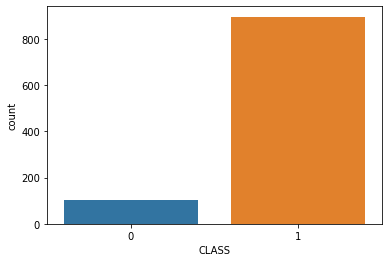

In [ ]:
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(Data['CLASS'])
plt.show()

In [ ]:
Data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [ ]:
Data['CLASS'].value_counts()

1    897
0    103
Name: CLASS, dtype: int64

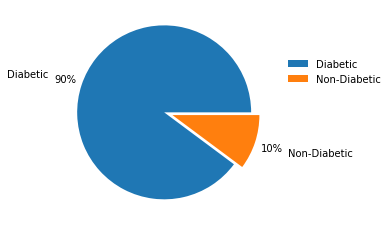

In [ ]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [89.97, 10.2]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [ ]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person
    is diabetic or not
    """
    return pd.DataFrame(Data.groupby('CLASS').mean()[var])

In [ ]:
def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure()
    ax = sns.distplot(Data[col_name][Data.CLASS == 1], color ="red", rug = True)
    sns.distplot(Data[col_name][Data.CLASS == 0], color ="lightblue",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])

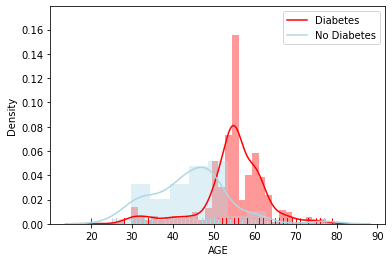

In [ ]:
distplot('AGE')

In [ ]:
mean_target('AGE')

,AGE
CLASS,
0,44.233010
1,54.595318


We see that the mean age of diabetic patients is higher.

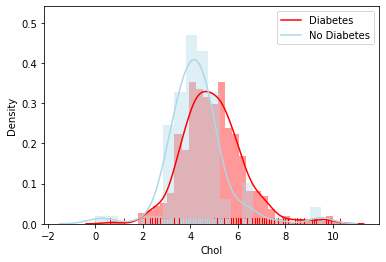

In [ ]:
distplot('Chol')

In [ ]:
mean_target('Chol')

,Chol
CLASS,
0,4.268932
1,4.931014


The Chol content is higher for diabetic patients.

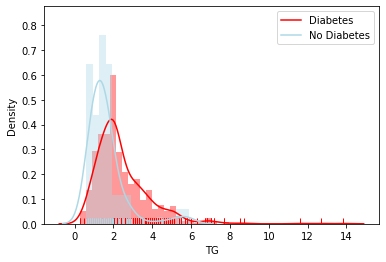

In [ ]:
distplot('TG')

In [ ]:
mean_target('TG')

,TG
CLASS,
0,1.625243
1,2.432787


Again the mean value for TG is higher for Diabetic patients .

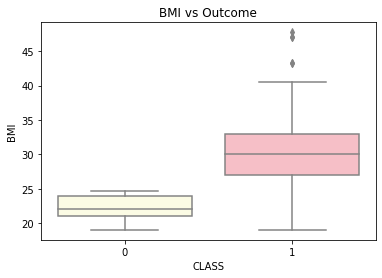

In [ ]:
my_pal = {0: "lightyellow", 1: "lightpink"}
sns.boxplot(x = 'CLASS', y = 'BMI', data = Data, palette = my_pal)
plt.title('BMI vs Outcome')
plt.show()

The BMI of diabetic patients is significantly higher than non diabetic cases.

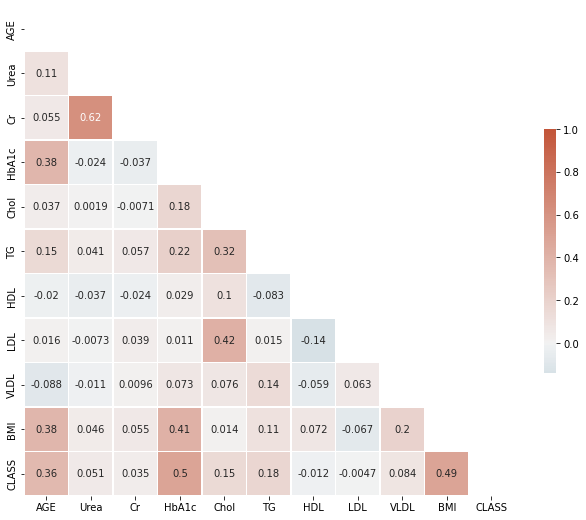

In [ ]:
corr = Data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [ ]:
from sklearn.model_selection import train_test_split

X = Data.drop('CLASS', axis = 1)
y = Data['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [ ]:
X.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train  = sc.fit_transform(X_train.drop('Gender' , axis = 1))
test  = sc.fit_transform(X_test.drop('Gender' , axis = 1))

In [ ]:
Train = pd.DataFrame(train, columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI'])

In [ ]:
Train.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,1.110482,-0.531218,-0.246027,0.735353,0.786409,0.540811,-0.146935,-0.026327,-0.141357,-0.305935
1,1.110482,1.205715,0.404868,0.302236,0.786409,-0.096693,-0.007121,0.959599,-0.241943,-0.104589
2,-0.706010,0.003223,-0.012373,-1.666474,0.331065,-0.025859,-0.706192,0.959599,-0.241943,-1.312660
3,0.202236,0.103431,0.271351,0.577856,0.255174,-0.380028,0.132693,0.511451,-0.292237,0.096756
4,-0.365418,-0.130387,-0.379544,-1.312106,-0.503731,-1.017532,1.670648,-1.101884,-0.367676,-1.111315


In [ ]:
Test = pd.DataFrame(test, columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI'])

In [ ]:
#@title evaluation
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(Train, y_train)

evaluation(lr, Train, y_train, Test, y_test, True)
print()
evaluation(lr, Train, y_train, Test, y_test, False)

Train Result:
Accuracy Score: 96.80%
_______________________________________________
F1 Score: 0.98
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.835443    0.983607     0.968    0.909525      0.968395
recall      0.857143    0.980684     0.968    0.918913      0.968000
f1-score    0.846154    0.982143     0.968    0.914148      0.968181
support    77.000000  673.000000     0.968  750.000000    750.000000
_______________________________________________
Confusion Matrix: 
 [[ 66  11]
 [ 13 660]]


Test Result:
Accuracy Score: 96.80%
_______________________________________________
F1 Score: 0.98
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.821429    0.986486     0.968    0.903958      0.969320
recall      0.884615    0.977679     0.968    0.931147      0.968000
f1-score    0.

In [ ]:
train_score_lr = round(accuracy_score(y_train, lr.predict(Train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(Test)) * 100, 2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(Train, y_train)

evaluation(dtc, Train, y_train, Test, y_test, True)
print()
evaluation(dtc, Train, y_train, Test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    77.0  673.0       1.0      750.0         750.0
_______________________________________________
Confusion Matrix: 
 [[ 77   0]
 [  0 673]]


Test Result:
Accuracy Score: 98.80%
_______________________________________________
F1 Score: 0.99
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.925926    0.995516     0.988    0.960721      0.988278
recall      0.961538    0.991071     0.988    0.976305      0.988000
f1-score    0.943396    0.993289     0.988    0.968342      0.988100


In [ ]:
train_score_dtc = round(accuracy_score(y_train, dtc.predict(Train)) * 100, 2)
test_score_dtc = round(accuracy_score(y_test, dtc.predict(Test)) * 100, 2)

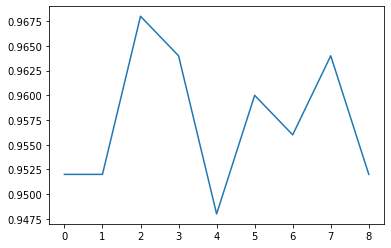

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(Test)))
    
plt.plot(accuracy_scores)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(Train, y_train)

evaluation(knn, Train, y_train, Test, y_test, True)
evaluation(knn, Train, y_train, Test, y_test, False)

Train Result:
Accuracy Score: 97.73%
_______________________________________________
F1 Score: 0.99
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.819149    1.000000  0.977333    0.909574      0.981433
recall      1.000000    0.974740  0.977333    0.987370      0.977333
f1-score    0.900585    0.987208  0.977333    0.943897      0.978315
support    77.000000  673.000000  0.977333  750.000000    750.000000
_______________________________________________
Confusion Matrix: 
 [[ 77   0]
 [ 17 656]]

Test Result:
Accuracy Score: 95.20%
_______________________________________________
F1 Score: 0.97
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.769231    0.973214     0.952    0.871223         0.952
recall      0.769231    0.973214     0.952    0.871223         0.952
f1-score    0.7

In [ ]:
train_score_knn = round(accuracy_score(y_train, knn.predict(Train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(Test)) * 100, 2)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.15)
xgb.fit(Train, y_train)

evaluation(xgb, Train, y_train, Test, y_test, True)
evaluation(xgb, Train, y_train, Test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    77.0  673.0       1.0      750.0         750.0
_______________________________________________
Confusion Matrix: 
 [[ 77   0]
 [  0 673]]

Test Result:
Accuracy Score: 98.40%
_______________________________________________
F1 Score: 0.99
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.923077    0.991071     0.984    0.957074         0.984
recall      0.923077    0.991071     0.984    0.957074         0.984
f1-score    0.923077    0.991071     0.984    0.957074         0.984
s

In [ ]:
train_score_xgb = round(accuracy_score(y_train, xgb.predict(Train)) * 100, 2)
test_score_xgb = round(accuracy_score(y_test, xgb.predict(Test)) * 100, 2)

In [ ]:
models = {
           'Train Accuracy': [train_score_lr, train_score_dtc,  train_score_knn, train_score_xgb],
          'Test Accuracy' : [test_score_lr, test_score_dtc,  test_score_knn, test_score_xgb]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Decision Tree Classifier',  'K-Nearest Neighbor', 'XGBoost'])
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,96.80,96.8
Decision Tree Classifier,100.00,98.8
K-Nearest Neighbor,97.73,95.2
XGBoost,100.00,98.4


**Cross Validation**

,CrossValMeans,CrossValerrors,Algorithm
0,0.961333,0.020177,Logistic Regression
1,0.988000,0.015144,Decision Tree
2,0.941333,0.033307,KNeighboors
3,0.986667,0.011926,XGBoosting


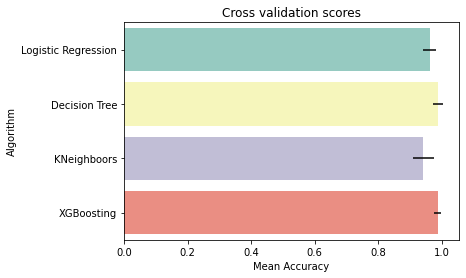

In [ ]:
#@title Cross validation.
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

kfold = StratifiedKFold(n_splits=10)

random_state = 0
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))

classifiers.append(KNeighborsClassifier())
classifiers.append(XGBClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, Train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Logistic Regression","Decision Tree",
 "KNeighboors", "XGBoosting"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

cv_res.head()